<a href="https://colab.research.google.com/github/kumarrajesh1992-arch/kumarrajesh1992-arch.github.io/blob/main/Chart7_WPR_Residual_State_HDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I import the required libraries

In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

I load the cleaned state-level dataset from colab storage

In [ ]:
df = pd.read_csv("/content/CC10_state_residuals_2023.csv")

I check the dataset structure

In [ ]:
df.head()
df.columns
df.shape

(36, 10)

I check the summary statistics for the key variables used in this regression

In [ ]:
df[['residual_HDI', 'WPR']].describe()
df[['residual_HDI', 'WPR']].isna().sum()

,0
residual_HDI,0
WPR,0


I create a quick diagnostic scatter plot of residual HDI vs WPR

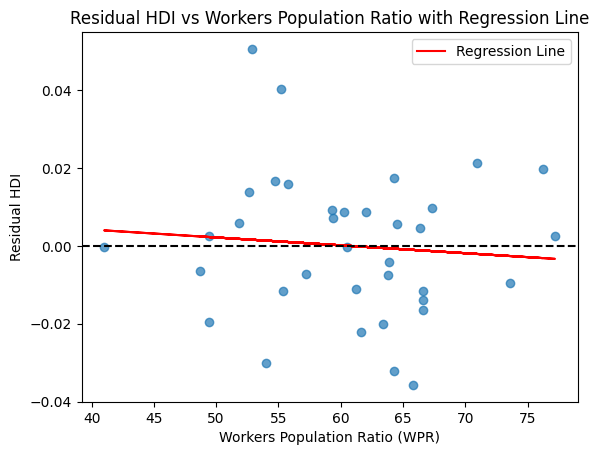

In [ ]:
import matplotlib.pyplot as plt
X = df[['WPR']]
y = df['residual_HDI']
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
model = LinearRegression()
model.fit(X_std, y)

df['residual_pred_wpr'] = model.predict(X_std)

plt.scatter(df['WPR'], df['residual_HDI'], alpha=0.7)
plt.plot(df['WPR'], df['residual_pred_wpr'], color='red', label='Regression Line')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Workers Population Ratio (WPR)")
plt.ylabel("Residual HDI")
plt.title("Residual HDI vs Workers Population Ratio with Regression Line")
plt.legend()
plt.show()

I define the regression inputs: WPR as X and residual_HDI as Y

In [ ]:
X = df[['WPR']]
y = df['residual_HDI']

I standardise WPR (z-score) so the coefficient is interpretable in SD units

In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

I estimate an OLS-equivalent linear regression using the standardised WPR.

In [ ]:
model = LinearRegression()
model.fit(X_std, y)

LinearRegression()

I extract and report the regression outputs (beta, interceot, R square)

In [ ]:
beta = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X_std, y)

beta, intercept, r2

(np.float64(-0.0015908661438015794),
 np.float64(-7.467032198744978e-12),
 0.007519709535349195)

I then generate predicted residual HDI values from the fitted model and store them.

In [ ]:
df['residual_pred_wpr'] = model.predict(X_std)

df_out = df[['State', 'residual_HDI', 'WPR', 'residual_pred_wpr']]
df_out.to_csv("Residual_HDI_WPR_Regression.csv", index=False)

I replot the scatter with the fitted regression line for visual interpretation

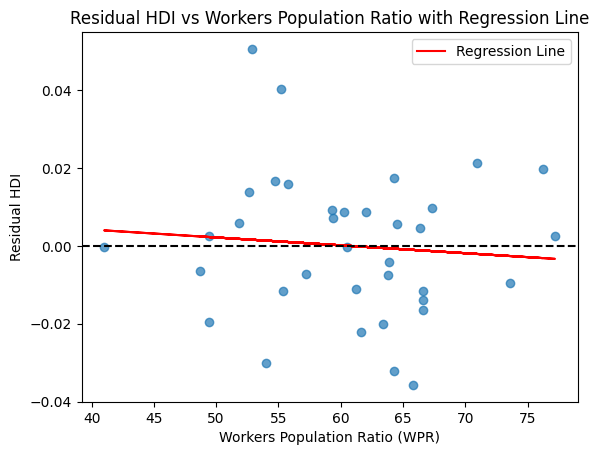

In [ ]:
plt.scatter(df['WPR'], df['residual_HDI'], alpha=0.7)
plt.plot(df['WPR'], df['residual_pred_wpr'], color='red', label='Regression Line')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Workers Population Ratio (WPR)")
plt.ylabel("Residual HDI")
plt.title("Residual HDI vs Workers Population Ratio with Regression Line")
plt.legend()
plt.show()

I display the dataframe to confirm the final outputs are correct.

In [ ]:
display(df.head())

,State,HDI,log_GNI_pc,HDI_pred,residual_HDI,WPR,Urban_MPCE,Rural_MPCE,SC_share,ST_share,residual_pred_wpr
0,Andaman and Nicobar Islands,0.706,9.334,0.710049,-0.004049,63.9,10268,7332,0.00,0.0,-0.000654
1,Andhra Pradesh,0.642,9.027,0.674105,-0.032105,64.3,6877,4996,16.41,5.3,-0.000735
2,Arunachal Pradesh,0.683,9.064,0.678437,0.004563,66.4,8649,5300,0.00,68.8,-0.001159
3,Assam,0.615,8.387,0.599173,0.015827,55.8,6210,3546,7.15,12.4,0.000982
4,Bihar,0.577,8.253,0.583484,-0.006484,48.7,4819,3454,15.91,1.3,0.002417


I export a clean state level output table for vega-lite

In [ ]:
df_out = df[['State', 'residual_HDI', 'WPR', 'residual_pred_wpr']]
df_out.to_csv("Residual_HDI_WPR_Regression.csv", index=False)
df_out.head()

,State,residual_HDI,WPR,residual_pred_wpr
0,Andaman and Nicobar Islands,-0.004049,63.9,-0.000654
1,Andhra Pradesh,-0.032105,64.3,-0.000735
2,Arunachal Pradesh,0.004563,66.4,-0.001159
3,Assam,0.015827,55.8,0.000982
4,Bihar,-0.006484,48.7,0.002417
